## Лабораторная работа №1 | Вариант 6

Выполнил: Хереш Артемий Игоревич

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [54]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [55]:
np.diag([1, 2, 3, 4], -1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [56]:
0
0.0

0.0

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [57]:
arr1 = np.array([1, 2, 2, 3, 5])
arr2 = np.array([2, 3, 4])

combined = np.concatenate([arr1, arr2])

unique, counts = np.unique(combined, return_counts=True)

max_count = np.max(counts)

most_frequent = unique[counts == max_count]

print(most_frequent)

[2]


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
np.seterr(all="ignore")


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [59]:
def generator(n):
    for x in range(n, n + 10):
        yield x

np.fromiter((x for x in generator(10)), int)


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [67]:
rng = np.random.default_rng()
rand_arr = rng.standard_normal(10)
print(rand_arr)
np.sort(rand_arr)


[ 1.21133531 -1.20382379  0.09969199 -2.05975814  2.14212978  0.46625377
  0.4884577   0.39801003  0.12724451 -1.17298519]


array([-2.05975814, -1.20382379, -1.17298519,  0.09969199,  0.12724451,
        0.39801003,  0.46625377,  0.4884577 ,  1.21133531,  2.14212978])

8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [66]:
rng = np.random.default_rng()
rand_arr = rng.standard_normal(20)
arr = rand_arr.reshape((10, 2))
print(arr)

for i, row in enumerate(arr):
    x, y = row
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    arr[i] = [r, theta]

arr

[[ 0.32880735  0.87619507]
 [-1.80252578 -0.68409031]
 [ 0.22329119  0.51321342]
 [-1.3962386  -0.31937372]
 [ 0.16388958 -1.07980807]
 [-1.00819411  0.83352331]
 [-0.57688371  1.22151825]
 [ 0.78534535  1.69028526]
 [ 0.50353024 -1.94658071]
 [-0.64859351 -0.23340905]]


array([[ 0.935859  ,  1.21179134],
       [ 1.92797271, -2.77886722],
       [ 0.5596847 ,  1.16041515],
       [ 1.43229948, -2.91672258],
       [ 1.09217455, -1.42016935],
       [ 1.30813473,  2.45075292],
       [ 1.35088921,  2.01201305],
       [ 1.86382177,  1.1358487 ],
       [ 2.01065143, -1.3176705 ],
       [ 0.68931366, -2.79615256]])

9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [65]:
pixel = np.dtype([("r", np.uint16),
                       ("g", np.uint16),
                       ("b", np.uint16),
                       ("x", np.uint16),
                       ("y", np.uint16)])
pixel

dtype([('r', '<u2'), ('g', '<u2'), ('b', '<u2'), ('x', '<u2'), ('y', '<u2')])

10. Как конвертировать тип массив от float32 в int32 in place?

In [3]:
arr = np.array([1.5, 2.7, 3.1, 4.9], dtype=np.float32)

arr.dtype = np.int32
arr

array([1069547520, 1076677837, 1078355558, 1084017869], dtype=int32)

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [2]:
import pandas as pd

In [10]:
df = pd.read_csv("student_perfomance.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [90]:
print(f'Среднее количество часов на сон = {df["Sleep_Hours"].mean()}')

Среднее количество часов на сон = 7.029060087785682


2. Сколько процентов студентов посещают внеклассовые активности?

In [21]:
percent = (df["Extracurricular_Activities"].value_counts()["Yes"] / df["Extracurricular_Activities"].count()) * 100
print(f'{percent}%')

59.60345088542455%


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [ ]:
df[df['Gender'] == 'Female']['Exam_Score'].mean() > df[df['Gender'] == 'Male']['Exam_Score'].mean()  

np.True_

4. Выведите 25 и 75 перцентили времени сна студентов

In [45]:
sleep_hours = df["Sleep_Hours"]
q75 = sleep_hours.quantile(0.75)
q25 = sleep_hours.quantile(0.25)
print(q25, q75)

6.0 8.0


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [46]:
df[sleep_hours >= q75]["Exam_Score"].mean() > df[sleep_hours <= q25]["Exam_Score"].mean()


np.False_

6. Влияет ли физическая активность на результаты экзамена?

In [43]:
phys_activity = df["Physical_Activity"]
df[phys_activity  > 3]["Exam_Score"].mean() > df[phys_activity  <= 3]["Exam_Score"].mean()

np.True_

7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [42]:
education_level = df["Parental_Education_Level"]
df[education_level != "High School"]["Exam_Score"].mean() > df[education_level == "High School"]["Exam_Score"].mean()

np.True_

8. Как влияет участие родителей на результаты экзаменов

In [48]:
parental_involment = df["Parental_Involvement"]
df[parental_involment != 'Low']["Exam_Score"].mean() > df[parental_involment == 'Low']["Exam_Score"].mean()

np.True_

9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [51]:
family_income = df["Family_Income"]
df[family_income == "high"]["Exam_Score"].mean() > df[family_income != "high"]["Exam_Score"].mean() 

np.False_

10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [58]:
print(f'{len(df[(df["Family_Income"] == "Low") & (df["Internet_Access"] == "No")]["Exam_Score"] > 70) / len(df) * 100}%')

3.193582563947329%


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [61]:
import matplotlib.pyplot as plt

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

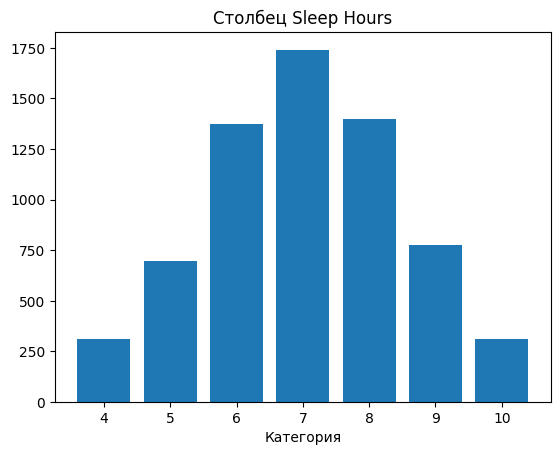

In [69]:

plt.bar(df["Sleep_Hours"].value_counts().index, df["Sleep_Hours"].value_counts().values,)
plt.title('Столбец Sleep Hours')
plt.xlabel('Категория')
plt.show()

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

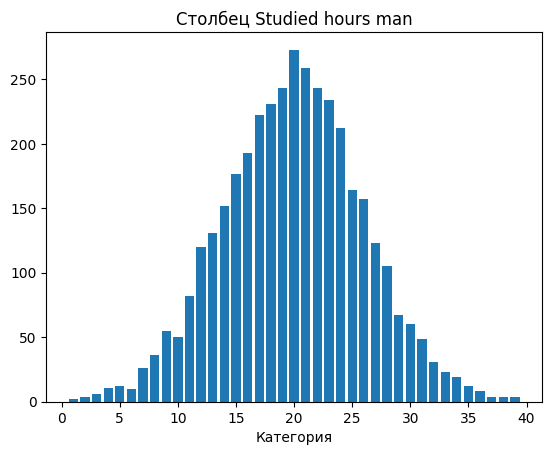

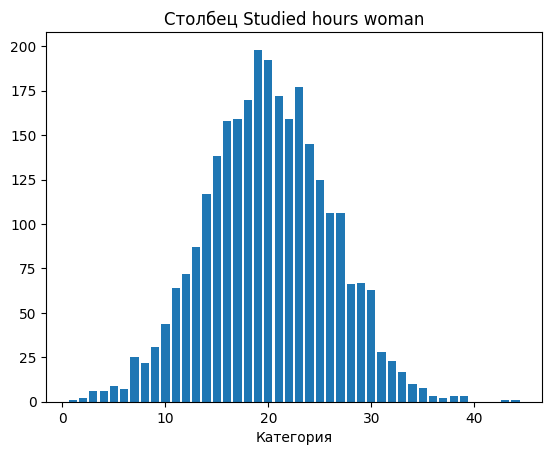

In [71]:
man_hours = df[df["Gender"] == "Male"]["Hours_Studied"]
female_hours = df[df["Gender"] == "Female"]["Hours_Studied"]

plt.bar(man_hours.value_counts().index, man_hours.value_counts().values,)
plt.title('Столбец Studied hours man')
plt.xlabel('Категория')
plt.show()

plt.bar(female_hours.value_counts().index, female_hours.value_counts().values,)
plt.title('Столбец Studied hours woman')
plt.xlabel('Категория')
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

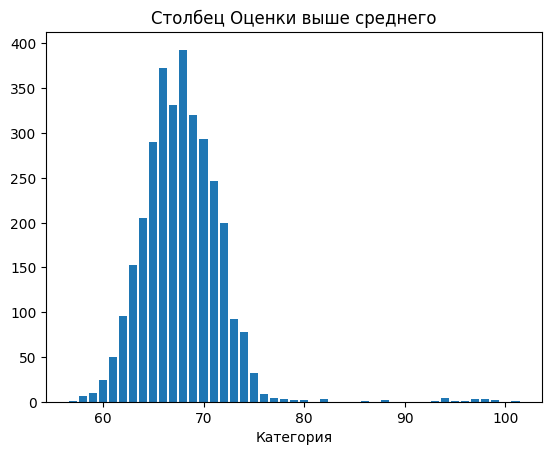

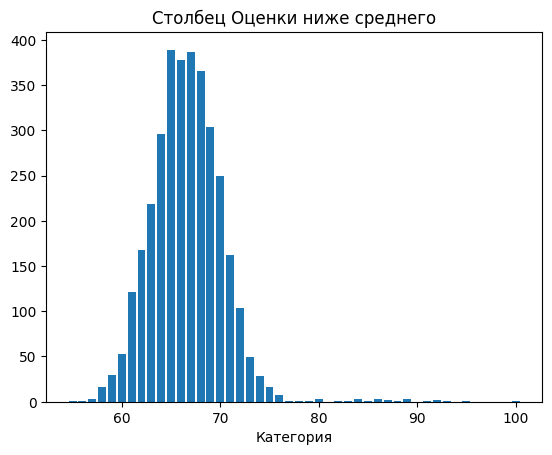

In [72]:
first_results = df["Previous_Scores"]
average = df["Previous_Scores"].mean()

positive = df[first_results > average]["Exam_Score"]
negative = df[first_results <= average]["Exam_Score"]


plt.bar(positive.value_counts().index, positive.value_counts().values,)
plt.title('Столбец Оценки выше среднего')
plt.xlabel('Категория')
plt.show()

plt.bar(negative.value_counts().index, negative.value_counts().values,)
plt.title('Столбец Оценки ниже среднего')
plt.xlabel('Категория')
plt.show()

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

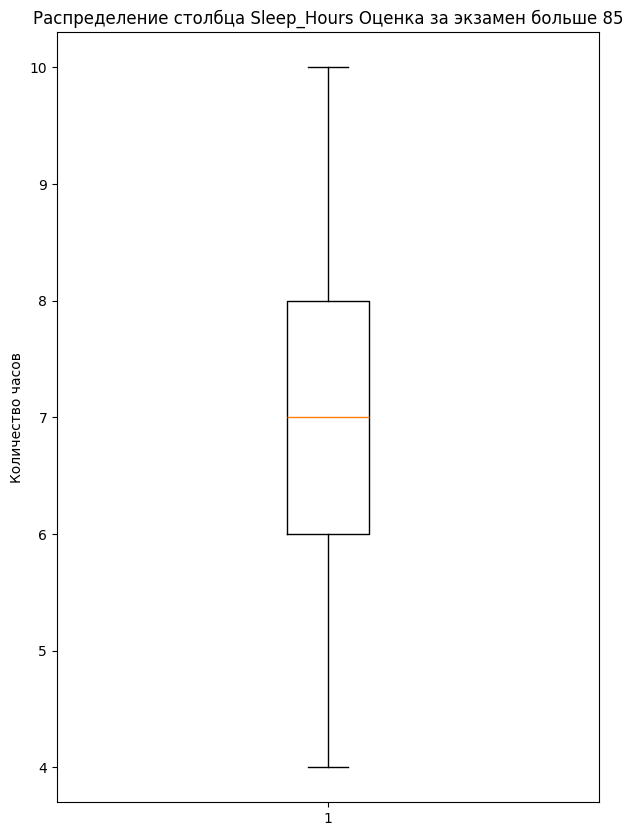

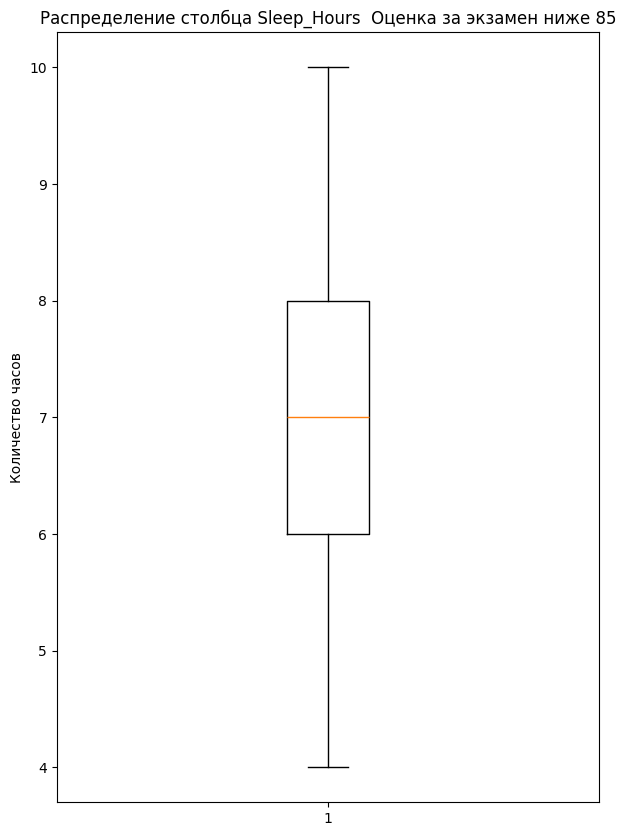

In [88]:
df.dropna(subset=["Sleep_Hours"], inplace=True)

marks = df["Exam_Score"]

plt.figure(figsize=(7, 10))
plt.boxplot(df[marks > 85]['Sleep_Hours'])
plt.title('Распределение столбца Sleep_Hours Оценка за экзамен больше 85')
plt.ylabel('Количество часов')
plt.show()

plt.figure(figsize=(7, 10))
plt.boxplot(df[marks < 85]['Sleep_Hours'])
plt.title('Распределение столбца Sleep_Hours  Оценка за экзамен ниже 85')
plt.ylabel('Количество часов')
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

6. Как физическая активность влияет на успеваемость?

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл